# Real Estate Insights: Agent Performance and Customer Sentiment

### 1. **Goals, Objectives, and Background**

   
   #### 1.1. **Introduction**
   
   The real estate industry is a critical part of the global economy, with property transactions involving high financial stakes. With the rise of data-driven decision-making, the ability to analyze patterns in real estate agents/agencies' performance and customer sentiment has become invaluable for both businesses and consumers. Understanding what factors contribute to customer satisfaction and agent success can help businesses improve their services and provide better guidance to buyers and sellers.

   In this project, we aim to explore various aspects of real estate data, focusing on agent/agency performance, customer feedback, and geographical trends. Our analysis is based on a dataset containing agent profiles, ratings, reviews, and other key metrics. This project seeks to uncover patterns and insights that can help real estate agents, agencies, and potential home buyers make informed decisions.

   #### 1.2. **Goals and Objectives**
   
   The goals of this project are to investigate several key areas of real estate performance and sentiment through data analysis, focusing on the following questions:
   
   - **Analysis by Location**:
     - How do agents/agencies perform across different cities? Are there geographical trends in ratings and customer feedback?
     - How does customer satisfaction vary in different locations, and are there patterns in agent performance based on city?
   
   - **Real Estate Agent/Agency Classification Analysis**:
     - How can we evaluate and rank real estate agents and agencies based on key performance indicators (such as ratings, number of reviews, and engagement efforts)?
     - Can we create a **performance score** that reflects an agent's or agency's overall success?
     - How do different factors—such as the number of reviews, rating, and number of photos published—affect agent success?
   
   - **Sentiment Analysis of Reviews**:
     - What are customers saying about their experiences with real estate agents/agencies?
     - Can we classify customer reviews into positive, negative, or neutral sentiments, and how does this feedback differ across locations?
     - How does sentiment analysis correlate with agent/agency performance in terms of ratings and reviews?

### 2. **Main Objectives and Scope**
   
   Within this project, we aim to:
   
   - Explore the **geographical distribution** of real estate agent performance and customer feedback.
   - Develop a **classification model** to rank agents/agencies based on their performance using factors like ratings, reviews, and other engagement metrics.
   - Conduct a **sentiment analysis** of customer reviews to identify trends in customer satisfaction and dissatisfaction, and compare these insights with agent performance.
   - Provide actionable insights for real estate professionals to improve service quality and customer engagement.
   
### 3. **Analysis Breakdown**

   The project is divided into three major components:
   
   - **Analysis by Location**: Understanding agent performance and customer satisfaction across different cities.
   - **Real Estate Agent/Agency Classification Analysis**: Creating a performance score based on key indicators such as ratings, reviews, and published content.
   - **Sentiment Analysis of Reviews**: Classifying customer feedback into positive, negative, and neutral sentiments to identify patterns of satisfaction and dissatisfaction.

## Installing Required Packages

In [1]:
!pip install pandas psycopg2-binary
!pip install folium
!pip install geopandas
!pip install branca
!pip install textblob              

In [2]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import psycopg2 as pg
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from textblob import TextBlob
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="darkgrid", color_codes=True)

## Importing Libraries

In [3]:
# Importing necessary libraries for data manipulation, visualization, and analysis
import pandas as pd
import psycopg2 as pg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from folium.plugins import HeatMap
import folium
import warnings
from IPython.display import display

# Suppress specific warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Setting default Seaborn style for plots
sns.set(style="darkgrid", color_codes=True)

## Connecting to the Database and Loading Data

In [4]:
# Establishing a connection to the PostgreSQL database
engine = pg.connect("dbname='clever' user='clever' host='postgres_clever' port='5432' password='clever'")

# Reading the real estate agent data from the database into a pandas DataFrame
df_google_agents_data = pd.read_sql('SELECT * FROM public.google_agents_data', con=engine)

# Displaying the shape of the DataFrame (number of rows and columns)
df_google_agents_data.shape

(17818, 69)

# **Exploratory Analysis**

## **Analysis by Location**


### **Is there a relationship between the number of agents and their average rating by state?**

- **Analysis**: The bar plot represents the number of real estate agents in each state, while the line plot indicates the average rating (review score) of these agents. However, with the exception of **Florida**, **Texas**, and **Washington**, the other states have too few agents to consider their review scores statistically significetter ratings.

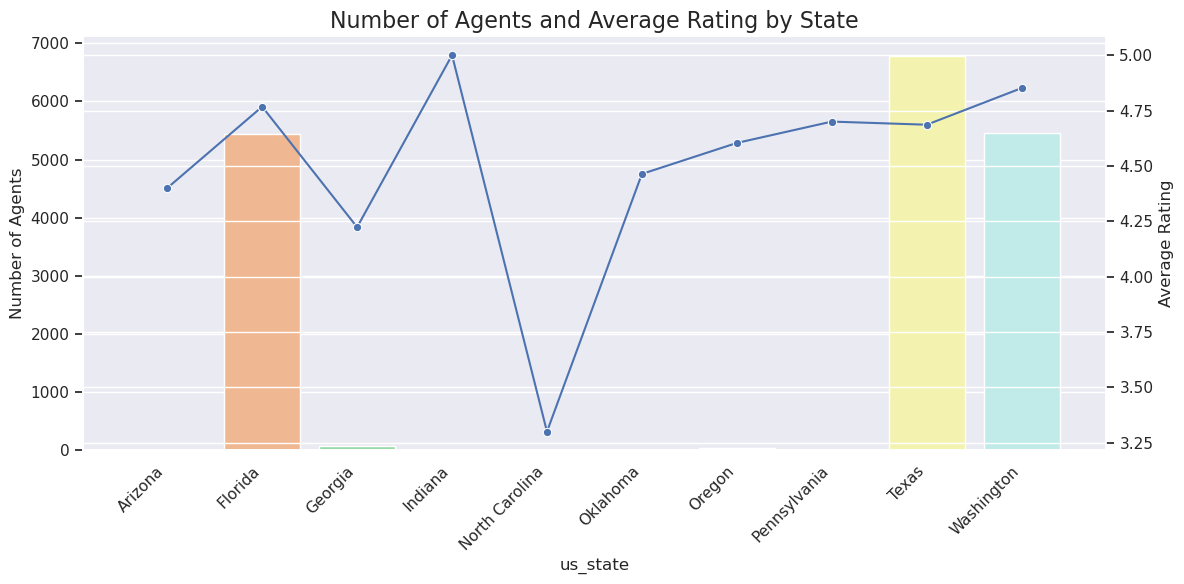

In [5]:
# Group by state to calculate the number of agents and the mean rating
state_summary = df_google_agents_data.groupby('us_state').agg(
    num_agents=('us_state', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

# Plotting with improved visual adjustments
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of agents with increased width
sns.barplot(x='us_state', y='num_agents', data=state_summary, palette='pastel', ax=ax1)
ax1.set_ylabel('Number of Agents', fontsize=12)
ax1.set_title('Number of Agents and Average Rating by State', fontsize=16)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis for the average rating
ax2 = ax1.twinx()
sns.lineplot(x='us_state', y='mean_rating', data=state_summary, color='b', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

  Focusing on the three states with the highest number of agents — **Florida**, **Texas**, and **Washington** — provides a clearer view of the relationship between the number of agents and their average rating.

  - **Observation 1**: **Florida** has a relatively high number of agents, and its average rating is close to that of **Washington**. This suggests that Florida, like Washington, benefits from a balance between agent quantity and service quality, resulting in strong ratings.
  
  - **Observation 2**: **Texas** has the highest number of agents but holds a relatively low average rating compared to **Florida** and **Washington**. This could suggest that a higher number of agents may lead to a wider variation in service quality, potentially pulling down the average rating.
  
  - **Observation 3**: **Washington** has a slightly lower number of agents compared to **Texas**, but it shows the highest average rating. This indicates that Washington agents might be providing more consistent and higher-quality services, which results in better overall customer satisfaction.

### **Which cities have the highest number of unique agents/agencies?**

- **Analysis**: The bar chart illustrates the number of unique agents or agencies in **Miami**, **Dallas**, and **Seattle**. These cities represent key areas for analyzing real estate agent distribution and potential market dynamics.

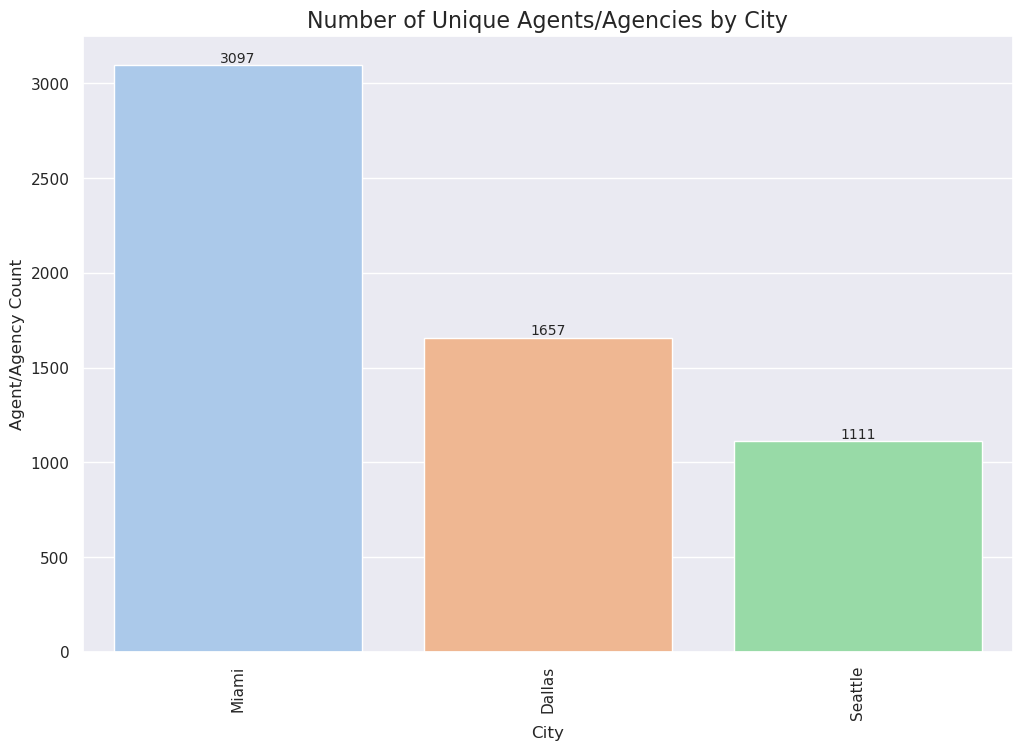

In [6]:
# Group by city and count unique google_id
df_city_counts = df_google_agents_data.groupby('city')['google_id'].nunique().reset_index(name='agent_count')
df_city_counts = df_city_counts.sort_values('agent_count', ascending=False)

# Plot the bar chart for the count of agents by city
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='city', y='agent_count', data=df_city_counts, palette='pastel')
ax.set_title('Number of Unique Agents/Agencies by City', fontsize=16)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Agent/Agency Count', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add exact numbers above each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

  - **Observation 1**: **Miami** leads with 3,097 unique agents/agencies, suggesting a highly active and potentially competitive real estate market.
  
  - **Observation 2**: **Dallas** follows with 1,657 agents/agencies, indicating a strong real estate presence, albeit smaller than Miami's.
  
  - **Observation 3**: **Seattle** has 1,111 agents/agencies, reflecting a smaller but still substantial real estate market.

### **Does the data show more locations beyond the three cities observed previously?**

- **Analysis**: The heatmap visualizes the distribution of real estate agents or agencies across the United States based on their geographic coordinates (latitude and longitude). Unlike the data grouped by the `'city'` column, which only highlighted **Miami**, **Dallas**, and **Seattle**, this visualization shows that we actually have agent data from a broader range of locations beyond these three cities.

In [7]:
# Load the latitude and longitude data of the agents
df_coords = df_google_agents_data[['latitude', 'longitude']].dropna()

# Create a base map centered on the average location of the agents
map_center = [df_coords['latitude'].mean(), df_coords['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add the heatmap based on the latitude and longitude coordinates
heat_data = [[row['latitude'], row['longitude']] for index, row in df_coords.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)

# Display the map directly in JupyterLab
display(m)


  - **Observation 1**: The heatmap reveals clusters in multiple regions across the U.S., including central, southeastern, and western areas, indicating that the data includes agents from other cities not captured when solely using the `'city'` column.
  
  - **Observation 2**: Despite the presence of agents in other regions, the color intensity of the heatmap suggests that the majority of the agents are concentrated in **Miami**, **Dallas**, and **Seattle**. These cities show the highest density, as reflected by the bright red and yellow zones on the map.

### **How do the ratings of agents compare across different cities?**

- **Analysis**: The boxplot shows the distribution of ratings for agents in **Miami**, **Dallas**, and **Seattle**. It visualizes the central tendency and variability of ratings within each city, along with the presence of outliers. This allows us to compare the overall satisfaction level of agents in different locations.

### <a id="boxplot"></a> Boxplot Analysis of Ratings by City

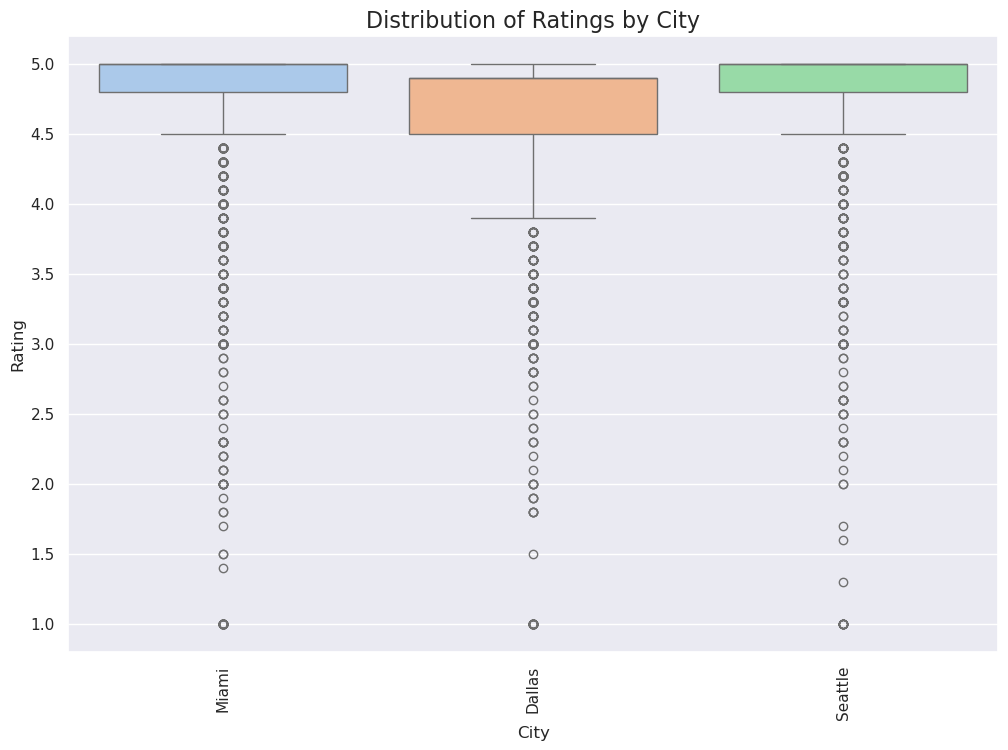

In [8]:
# Plot the boxplot for the distribution of ratings by city
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='city', y='rating', data=df_google_agents_data, palette='pastel')
ax.set_title('Distribution of Ratings by City', fontsize=16)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

  - **Observation 1**: **Miami** has the most consistent ratings, with the majority of agents receiving ratings between 4.5 and 5.0. The city also has a few outliers with lower ratings, but overall, the ratings remain high and tightly grouped.
  
  - **Observation 2**: **Dallas** has a wider distribution of ratings, ranging from around 3.9 to 5.0. This indicates more variability in the ratings across agents in Dallas. The larger gap between these quartiles shows that a significant number of agents have ratings below 4.5, even though the overall ratings still remain relatively high. This variation could point to a broader range of service quality among agents in Dallas.
  
  - **Observation 3**: **Seattle** also displays a narrow distribution similar to Miami, with most agents receiving ratings between 4.5 and 5.0. However, like Miami and Dallas, it has a few outliers with ratings significantly lower than the median.

### **What is the relationship between the number of reviews and the ratings by city?**

- **Analysis**: The scatter plot visualizes the relationship between the number of reviews and the ratings for agents in **Miami**, **Dallas**, and **Seattle**. Each point represents an agent, with the x-axis showing the number of reviews and the y-axis showing the corresponding rating. This allows us to observe whether agents with more reviews tend to have higher or lower ratings and how this relationship differs by city.

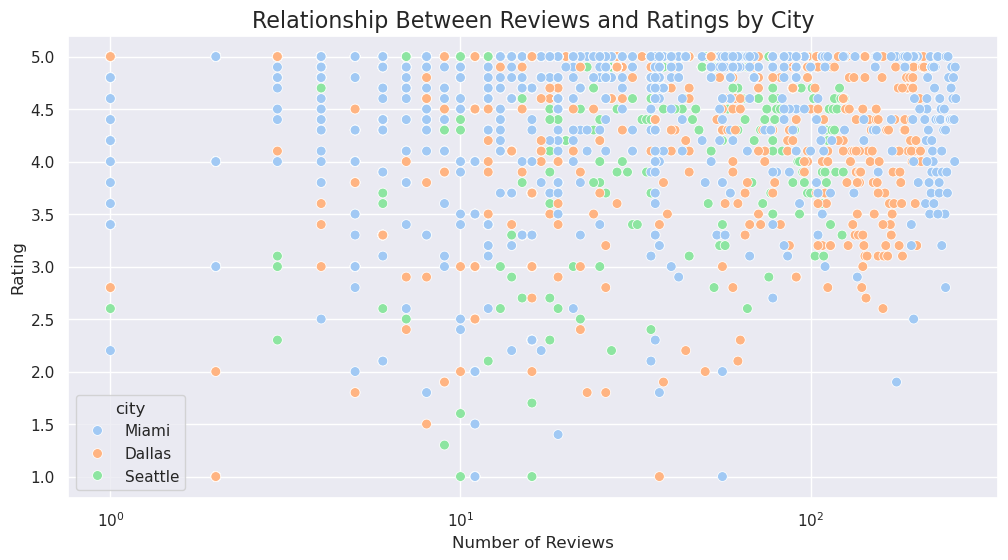

In [9]:
# Scatter plot for the relationship between reviews and rating, grouped by city
plt.figure(figsize=(12, 6))
sns.scatterplot(x='reviews', y='rating', hue='city', data=df_google_agents_data, palette='pastel', s=50)

# Set the title and labels
plt.title('Relationship Between Reviews and Ratings by City', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Set x-axis to log scale
plt.xscale('log')

# Show the plot
plt.show()


  - **Observation 1**: In **Miami**, agents with a higher number of reviews generally maintain strong ratings, clustering around the 4.5 to 5.0 range. There are a few exceptions, but overall, agents in Miami with more than 10 reviews tend to be highly rated, suggesting a positive correlation between the number of reviews and high ratings.
  
  - **Observation 2**: **Dallas** shows more variability. While agents with many reviews (over 100) generally have high ratings, there is a broader spread of ratings, especially for agents with fewer reviews. Dallas has agents with fewer than 10 reviews receiving ratings that range from 1.0 to 5.0, indicating more mixed experiences for customers. This suggests that in Dallas, agents with fewer reviews are not as consistently high-rated compared to Miami.
  
  - **Observation 3**: **Seattle** also shows some variability in ratings, but agents with more reviews tend to have higher ratings, similar to Miami. However, compared to Miami, Seattle has a few more agents with a significant number of reviews (around 10 or more) who receive lower ratings, indicating that even popular agents may not always perform consistently.

## **Real Estate Agent/Agency Classification Analysis**

### **Performance Score Analysis**:

- **Classification Criteria**: To analyze and rank real estate agents and agencies, we can evaluate them based on three key performance factors:
  - **Rating**: A direct reflection of customer satisfaction.
  - **Number of Reviews**: Indicates the agent’s popularity or level of engagement with clients.
  - **Number of Photos Published**: Demonstrates the agent’s or agency's effort in providing property visuals, which can influence potential buyers.

  Using these factors, we calculate a **performance score** for each agent/agency, with the following weighting:
  - **Rating**: 50% of the score, as it is the most direct measure of customer satisfaction.
  - **Number of Reviews**: 40% of the score, as it reflects how active the agent is and how often they interact with customers.
  - **Number of Photos Published**: 10% of the score, as it complements the agent’s efforts in showcasing properties.

#### **Performance Score Calculation**:
The performance score is a weighted average of the scaled values of these three metrics (rating, reviews, and photos). Each metric is normalized using a MinMaxScaler to ensure that the scales of the different criteria are comparable. The equation for the **performance score** is:

$$
\text{performance\_score} = (\text{rating\_scaled} \times 0.5) + (\text{reviews\_scaled} \times 0.4) + (\text{photos\_scaled} \times 0.1)
$$


In [10]:
# Remove rows with missing data in the relevant columns
df_filtered = df_google_agents_data.dropna(subset=['rating', 'reviews', 'photos_count']).copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the relevant fields
df_filtered['rating_scaled'] = scaler.fit_transform(df_filtered[['rating']])
df_filtered['reviews_scaled'] = scaler.fit_transform(df_filtered[['reviews']])
df_filtered['photos_scaled'] = scaler.fit_transform(df_filtered[['photos_count']])

# Calculate the performance_score using the defined weights
df_filtered['performance_score'] = (
    df_filtered['rating_scaled'] * 0.5 +  
    df_filtered['reviews_scaled'] * 0.4 +  
    df_filtered['photos_scaled'] * 0.1  
)

# Create the ranking column based on the performance_score (descending order)
df_filtered['ranking'] = df_filtered['performance_score'].rank(ascending=False, method='min').astype(int)

# Sort the results according to the ranking
df_performance = df_filtered[['google_id', 'name', 'rating', 'reviews', 'photos_count', 'performance_score', 'ranking']].sort_values(by='ranking')

# Display the Top Performers
display(df_performance.head(10))


,google_id,name,rating,reviews,photos_count,performance_score,ranking
17603,0x88d9c7fa6addb759:0xb3b1e5a85f838ed7,Gold Coast Schools,4.9,1293.0,101.0,0.892392,1
17671,0x88d9ea8bc8dd24c5:0xa969832b22de2e00,Casa Vera Apartments,4.6,936.0,796.0,0.778368,2
14943,0x88d9b7a44b3d23e7:0xf21d3381583790b6,Roami,4.6,894.0,232.0,0.737772,3
16408,0x88d9c0fa56d8048b:0xf1bdb39f000dbca9,Kendall Corners,4.4,731.0,774.0,0.688824,4
15456,0x88d9b92525655e3f:0xb749f9ee6297c992,Doral View,4.3,760.0,515.0,0.672631,5
16458,0x88d9c116d7035455:0xd7a4ef9b16089b06,Rent 1 Sale 1 Realty - Kendall,4.7,518.0,2.0,0.622611,6
16330,0x88d9c03469d05b51:0x19761871307d33a1,Bridges at Kendall Place,4.8,363.0,669.0,0.619755,7
16336,0x88d9c04c33083c51:0xbaeaa56b9ad2b09e,Cortland Kings Meadow,4.4,605.0,100.0,0.616840,8
15113,0x88d9b7d53278c949:0x5b09a96d3922ba1b,Jorge A Alvarez License Broker/ Owner of JandR...,5.0,25.0,2045.0,0.607430,9
17131,0x88d9c4764dd18295:0x243158320389801f,Credit360 Credit Repair Services,4.8,338.0,345.0,0.596164,10


In [11]:
# Display Low Performers
display(df_performance.tail(10))

,google_id,name,rating,reviews,photos_count,performance_score,ranking
13621,0x88d9b68158db8649:0xc40cf766d46c74b3,Capital Int'l Realty LLC,1.0,1.0,1.0,0.0,2842
13373,0x88d9b48d62d72c19:0x1cb1d91b64dbc207,CJW Real Estate Solutions LLC,1.0,1.0,1.0,0.0,2842
13615,0x88d9b681456ffffd:0xe47368f01f3c23c8,AGG Miami Realty,1.0,1.0,1.0,0.0,2842
13181,0x88d9b22914cefa01:0xe9eeee5b53a7af4c,Keller Williams Realty: Ronald Platt,1.0,1.0,1.0,0.0,2842
12648,0x88d9ac51330fb35b:0x5de587987759668a,Wharton Realty Group LLC,1.0,1.0,1.0,0.0,2842
14081,0x88d9b6aa87c00001:0x8bb780f51059c6e7,"Green River Homes, LLC",1.0,1.0,1.0,0.0,2842
13213,0x88d9b30e099cb619:0x626405a56af829f9,"Shane Graber, GRABER Realty Group",1.0,1.0,1.0,0.0,2842
17704,0x88f53089ffe603e9:0x31f4ab1226162015,Patriot Realty Inc,1.0,1.0,1.0,0.0,2842
17176,0x88d9c6f3ab556acf:0xe885467a0db86e18,Coldwell Banker Realty,1.0,1.0,1.0,0.0,2842
17740,0x88f531e016b010cb:0x9f9cc7fde0253b56,Basic Realty Inc,1.0,1.0,1.0,0.0,2842


#### **Analysis**:
1. **Top Performers**: Agents or agencies with the highest **performance score** are those who have consistently high ratings, a large number of reviews, and a good presence in terms of property visuals.
   
2. **Mid-level Performers**: Agents with average ratings but many reviews might be more active in the market but need to improve their service quality, as reflected by their lower scores.
   
3. **Low Performers**: Agents with few reviews, lower ratings, and fewer property photos are likely less active or providing less satisfactory service, which will reflect in a lower performance score.

## **Sentiment Analysis of Reviews**

### **What is the Sentiment of Customer Reviews for Real Estate Agents/Agencies?**

- **Classification Criteria**: analyze customer reviews of real estate agents and agencies by classifying them into three sentiment categories:
  - **Positive**: Indicates satisfaction or positive feedback.
  - **Negative**: Indicates dissatisfaction or critical feedback.
  - **Neutral**: Indicates neither positive nor negative feedback.

#### **Sentiment Classification Method**:
The sentiment of each review is determined using the **TextBlob** library, which calculates the **polarity** of the review:
  - **Polarity > 0**: Classified as **Positive**.
  - **Polarity < 0**: Classified as **Negative**.
  - **Polarity = 0**: Classified as **Neutral**.

This method helps categorize customer feedback efficiently, allowing us to quickly assess overall sentiment.

In [12]:
# Remove rows where 'review_text' is null or empty
df_cleaned = df_google_agents_data.dropna(subset=['review_text']).copy()  # Use .copy() to avoid issues

# Define a function to classify sentiment based on polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'review_text' column to create a 'sentiment' column
df_cleaned.loc[:, 'sentiment'] = df_cleaned['review_text'].apply(get_sentiment)  # Use .loc to avoid the warning

# Display the first few rows with the new 'sentiment' column
df_sentiment = df_cleaned[['google_id', 'name', 'city', 'review_text', 'sentiment']]

# Show the result
df_sentiment.sample(10)

,google_id,name,city,review_text,sentiment
7123,0x864c26c8a3f9fe6f:0x9f5f2eee19038a8b,Wildcat Movers - Dallas,Dallas,Darion and Walter were professional and quick ...,Positive
4286,0x549041c0f9681f39:0x3727a97e3c3fe947,Every Door Real Estate,Seattle,On a scale of 1 to 5 we would give Every Doir ...,Positive
8394,0x864c26c8a3f9fe6f:0x9f5f2eee19038a8b,Wildcat Movers - Dallas,Dallas,Wow!! We had an incredible experience with Wil...,Positive
6345,0x864c23cbe686ba49:0x36f546f2da21dc54,Housed Real Estate + Relocation,Dallas,Patty Moreno was our realtor for the recent sa...,Positive
5614,0x80c34b2454dc430b:0x4f2a25f129d58,JM Executive Moving,Miami,Very detailed oriented and carful when packing...,Positive
8417,0x864c26c8a3f9fe6f:0x9f5f2eee19038a8b,Wildcat Movers - Dallas,Dallas,"Very competitive price and fast, moved a lot o...",Positive
11017,0x864e9c8c3f1dc5eb:0x5afc911aca2e605e,AM Moving Company,Dallas,The experience with Andres cre was exceptional...,Positive
1130,0x5490153256eae503:0xe59e07887f34b33,Team Diva at Coldwell Banker Bain,Seattle,Kim and Chavi are meticulous and passionate wo...,Positive
14227,0x88d9b70283e0e1cf:0x727cab7ccb631918,Pure Moving Company Miami Movers Local & Long ...,Miami,"Great, prompt service. Highly recommend!",Positive
205,0x5490117e221f6117:0x9e5eea3090226dc5,Magic Moving and Delivery Services,Seattle,I called a couple dozen similar companies who ...,Positive


- **Insights**: This analysis reveals how customers feel about agents/agencies, helping to:
  - Identify agents/agencies with consistently positive feedback.
  - Highlight areas where customers are dissatisfied.
  - Spot opportunities for improvement based on neutral feedback.

By understanding the sentiment behind reviews, we gain a better perspective on customer experiences and areas where services can be enhanced.

### **What is the Sentiment of Customer Reviews for Real Estate Agents/Agencies in Different Cities?**

- **Analysis**: The doughnut charts show the distribution of sentiments (positive, neutral, and negative) in customer reviews for real estate agents/agencies in **Miami**, **Dallas**, and **Seattle**. These charts give a quick overview of how customers feel about their experiences in each city.

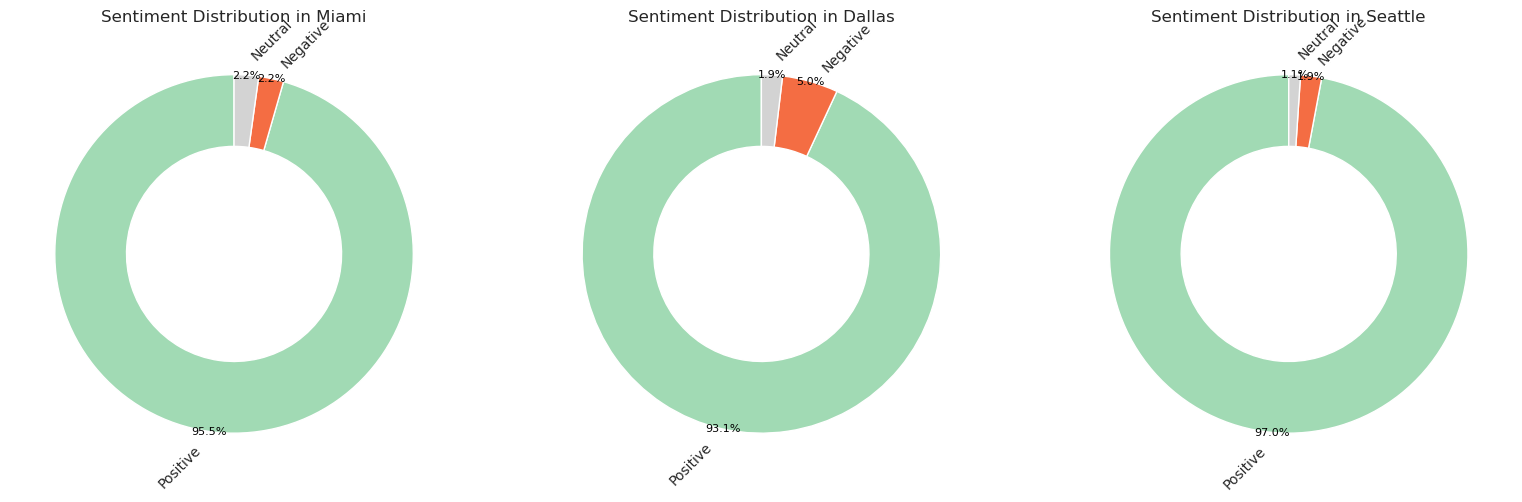

In [13]:
# Customized colors for each sentiment
colors = {
    'Positive': '#a1dab4',  # Light green
    'Neutral': '#d3d3d3',   # Light gray
    'Negative': '#f46d43'   # Light red
}

# Filter data by city (example: Miami, Dallas, Seattle)
cities = ['Miami', 'Dallas', 'Seattle']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Adjusting the size of the charts

# Generate doughnut charts for each city
for ax, city in zip(axes, cities):
    # Filter data by city
    df_city = df_cleaned[df_cleaned['city'] == city]
    
    # Count the number of reviews by sentiment
    sentiment_counts = df_city['sentiment'].value_counts()
    
    # Map colors according to sentiment
    city_colors = [colors[sentiment] for sentiment in sentiment_counts.index]
    
    # Create doughnut chart with customized colors and filled chart
    wedges, texts, autotexts = ax.pie(
        sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=city_colors, 
        wedgeprops=dict(width=0.4),  # Make the chart more filled
        pctdistance=1.0,             # Adjust the position of the percentages
        labeldistance=1.2,           # Move labels farther away
        textprops={'fontsize': 10}   # Set the font size of the labels
    )
    
    # Adjust the style of the percentage text
    for autotext in autotexts:
        autotext.set_color('black')  # Set text color
        autotext.set_size(8)         # Set the font size for percentages
    
    # Rotate the labels
    for text in texts:
        text.set_rotation(45)  # Rotate the labels by 45 degrees
    
    ax.set_title(f'Sentiment Distribution in {city}', fontsize=12)

# Adjust layout to avoid overlapping charts and text
plt.tight_layout()

# Display the charts
plt.show()

#### **Observations**:
1. **Miami**:
   - The overwhelming majority of reviews are **positive** (95.5%), with a very small percentage of **neutral** (2.2%) and **negative** (2.2%) reviews.
   - **Correlation with Ratings**: The [earlier boxplot](#boxplot) analysis supports this finding, showing that most agents in Miami have consistent high ratings between 4.5 and 5.0. The high percentage of positive reviews aligns with the narrow distribution of high ratings, indicating a generally high level of satisfaction with agents in this city.

2. **Dallas**:
   - Reviews in Dallas show slightly more variation, with **93.1% positive**, **1.9% neutral**, and a higher proportion of **negative** reviews (5.0%) compared to Miami and Seattle.
   - **Correlation with Ratings**: This finding is reflected in the boxplot for Dallas, where ratings showed more variability, ranging from 3.9 to 5.0. The wider range in the boxplot aligns with the higher proportion of negative reviews, indicating that customer satisfaction in Dallas is more mixed compared to Miami and Seattle.

3. **Seattle**:
   - Seattle stands out with **97.0% positive** reviews, the highest among the three cities, with only **1.1% neutral** and **1.1% negative** reviews.
   - **Correlation with Ratings**: Like Miami, Seattle also shows a narrow distribution of ratings between 4.5 and 5.0, which is consistent with the overwhelming majority of positive reviews. This indicates that agents in Seattle, much like those in Miami, are delivering a consistently high level of service.

#### **Conclusion**:
- Both the sentiment analysis and the boxplot of ratings reveal a clear correlation: cities with more positive reviews also have more consistently high ratings. **Miami** and **Seattle** show similarly strong customer satisfaction, with a narrow range of high ratings and very few negative reviews.
- In contrast, **Dallas** displays more variability in both ratings and review sentiments, suggesting that the quality of service among agents in Dallas may be more inconsistent, leading to a broader range of customer experiences.